Creating individual maps for 35 countries
Found existing shapefiles: ['ne_50m_admin_0_countries.shp']
Loading shapefile from: ne_50m_admin_0_countries.shp
Shapefile loaded successfully with 242 countries
Using 'NAME' column for country names
Creating map for: Algeria


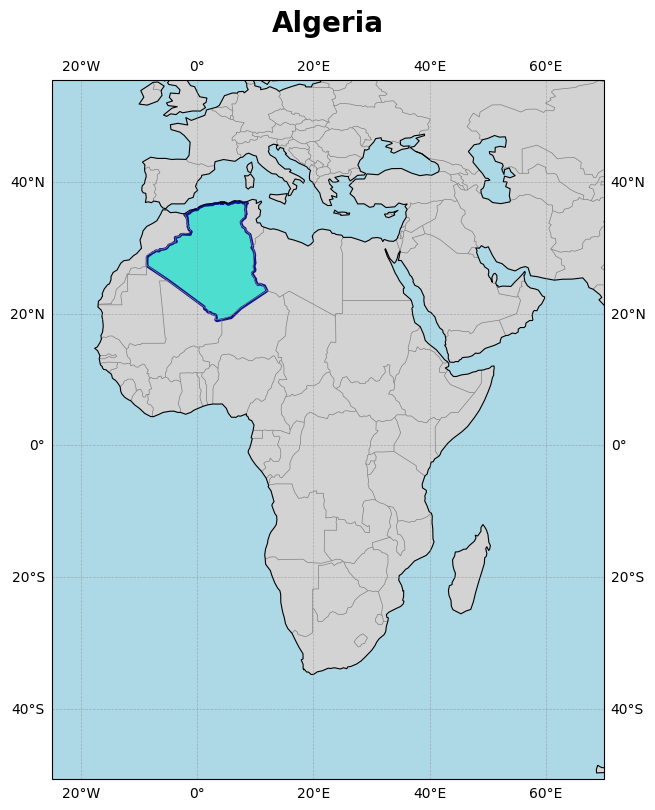

  ✓ Successfully created map for Algeria
Creating map for: Bahrain


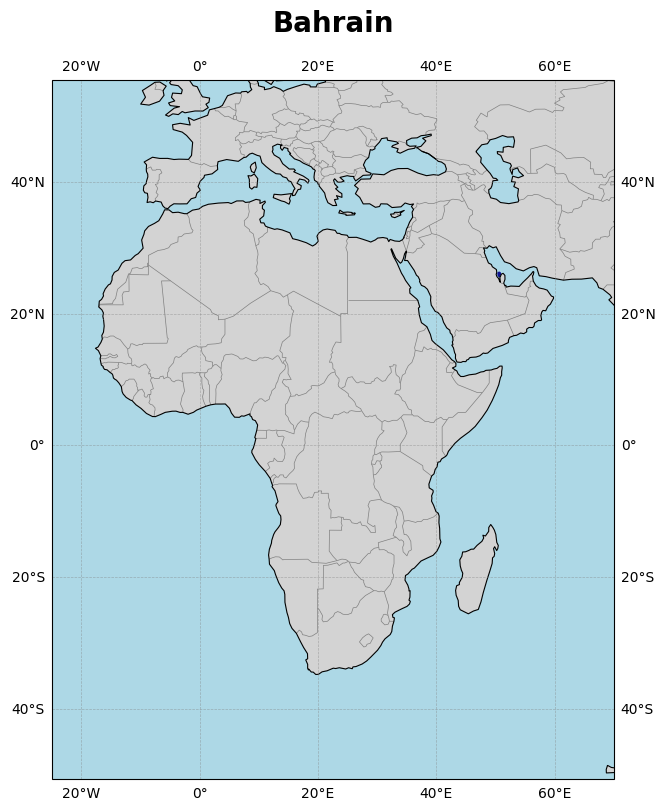

  ✓ Successfully created map for Bahrain
Creating map for: Egypt


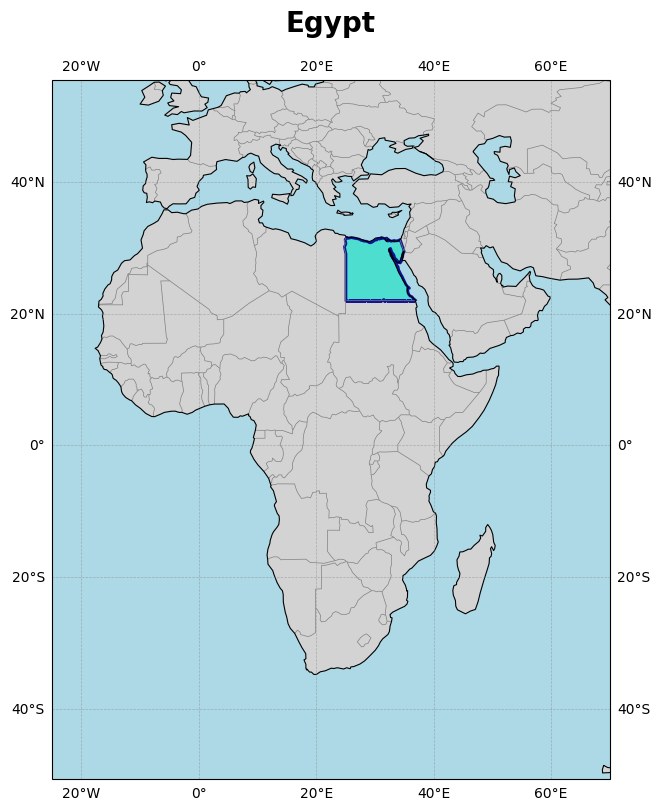

  ✓ Successfully created map for Egypt
Creating map for: Iran


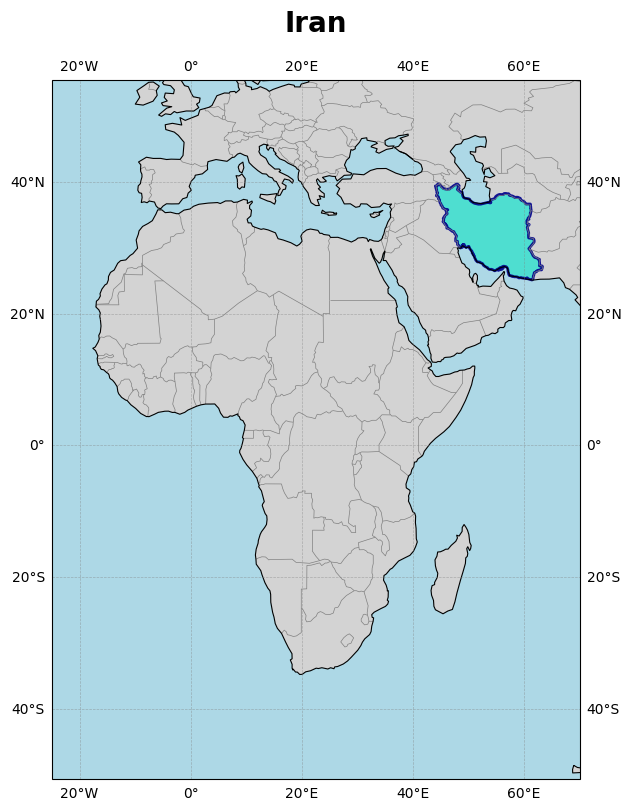

  ✓ Successfully created map for Iran
Creating map for: Iraq


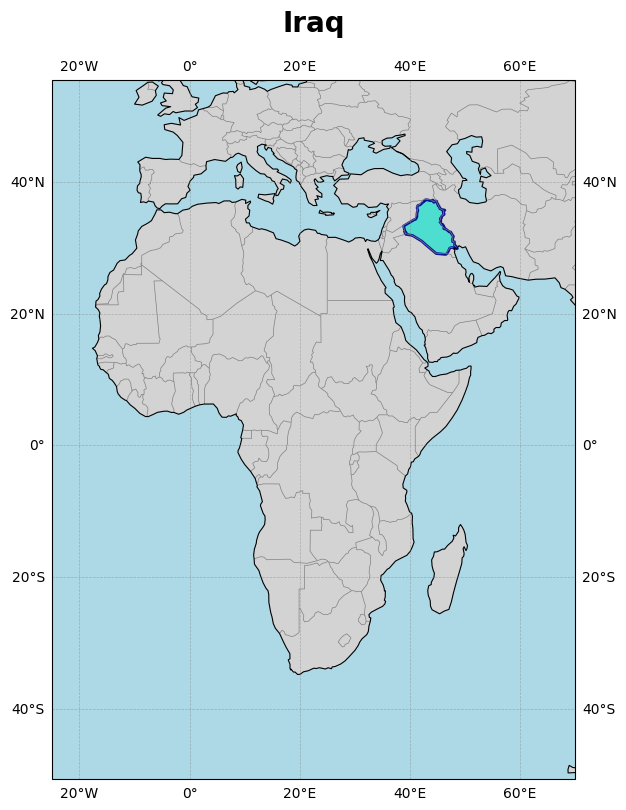

  ✓ Successfully created map for Iraq
Creating map for: Israel


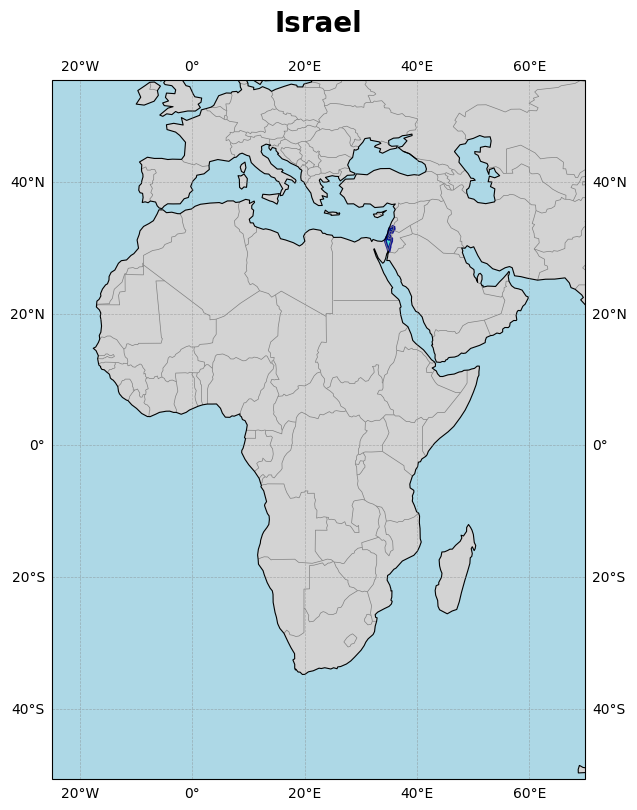

  ✓ Successfully created map for Israel
Creating map for: Jordan


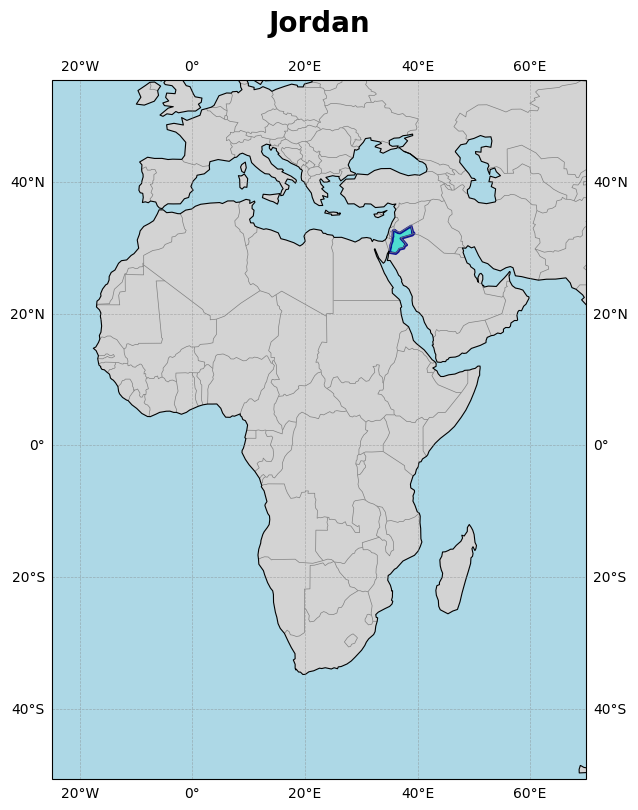

  ✓ Successfully created map for Jordan
Creating map for: Kuwait


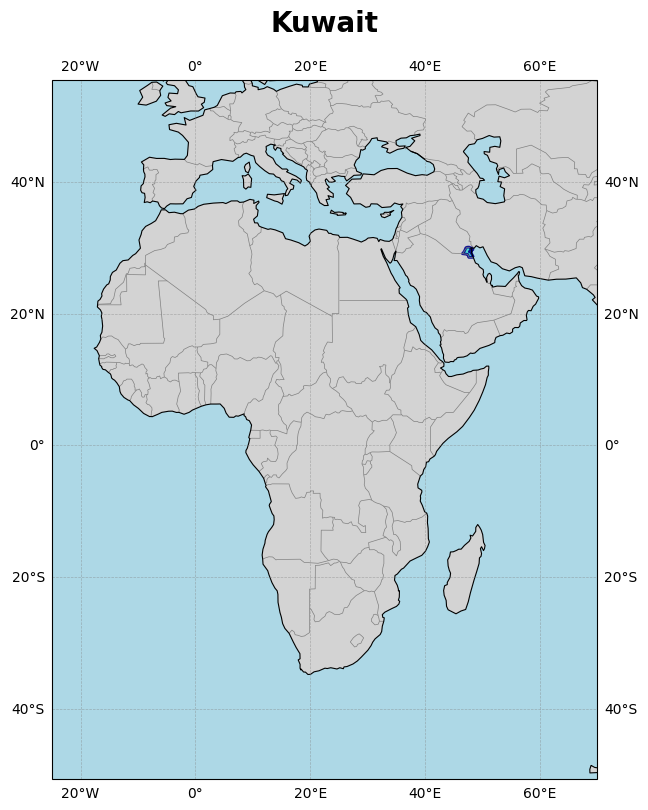

  ✓ Successfully created map for Kuwait
Creating map for: Lebanon


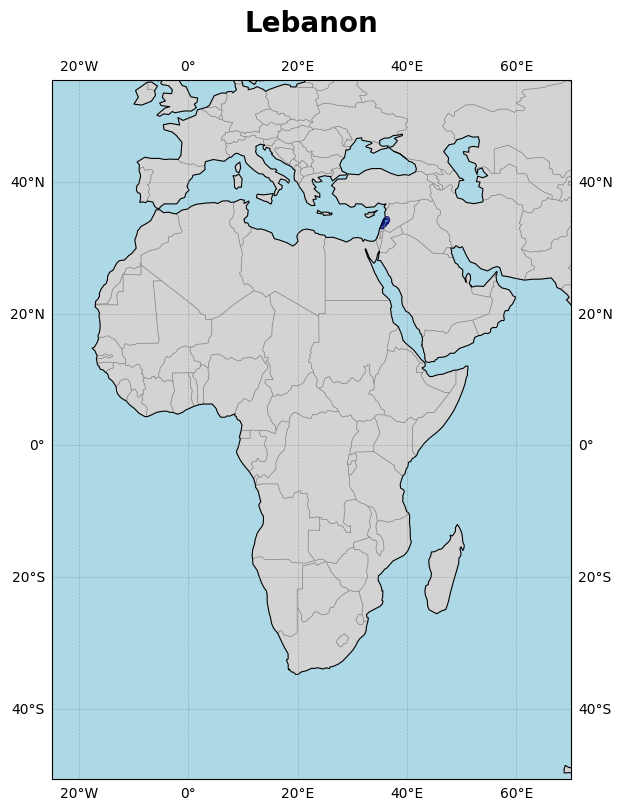

  ✓ Successfully created map for Lebanon
Creating map for: Libya


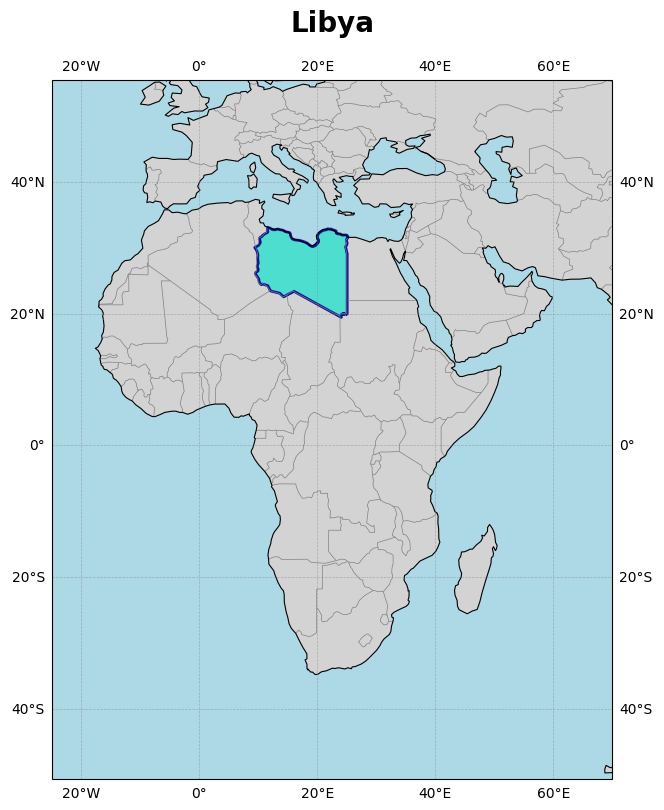

  ✓ Successfully created map for Libya
Creating map for: Morocco


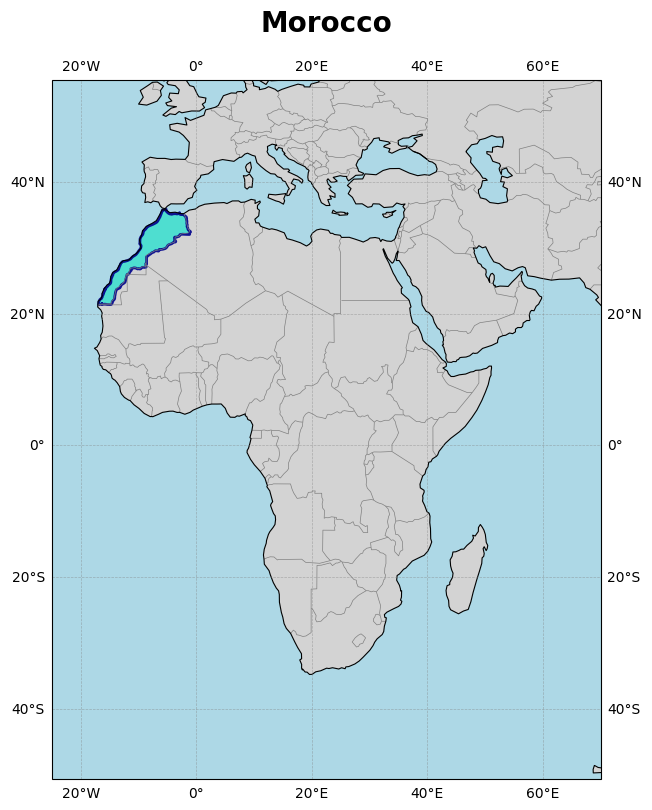

  ✓ Successfully created map for Morocco
Creating map for: Oman


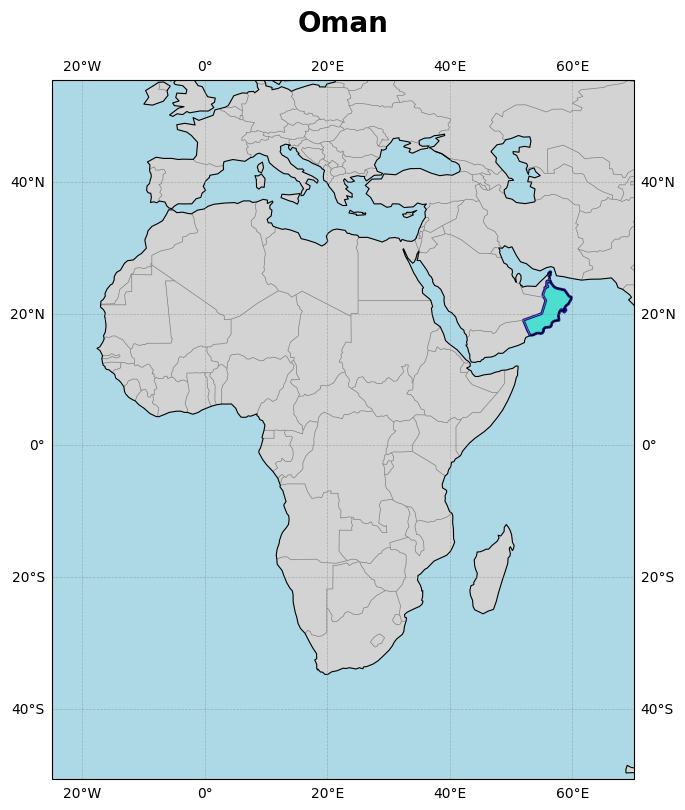

  ✓ Successfully created map for Oman
Creating map for: Qatar


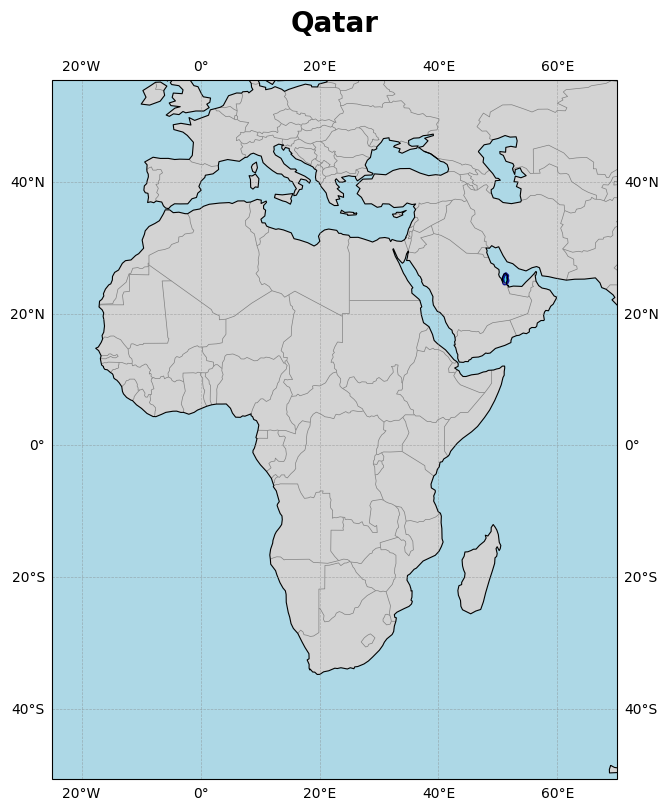

  ✓ Successfully created map for Qatar
Creating map for: Saudi Arabia


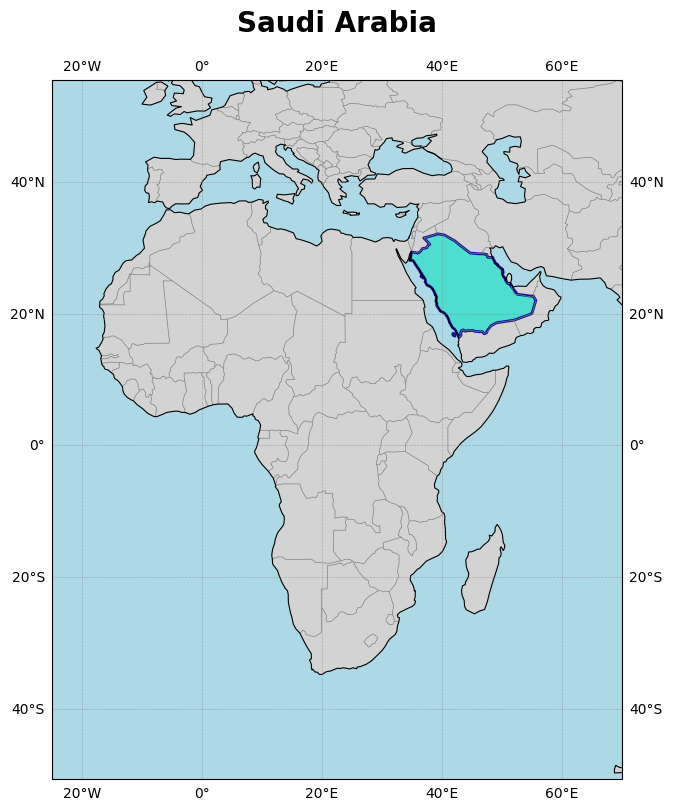

  ✓ Successfully created map for Saudi Arabia
Creating map for: Syria


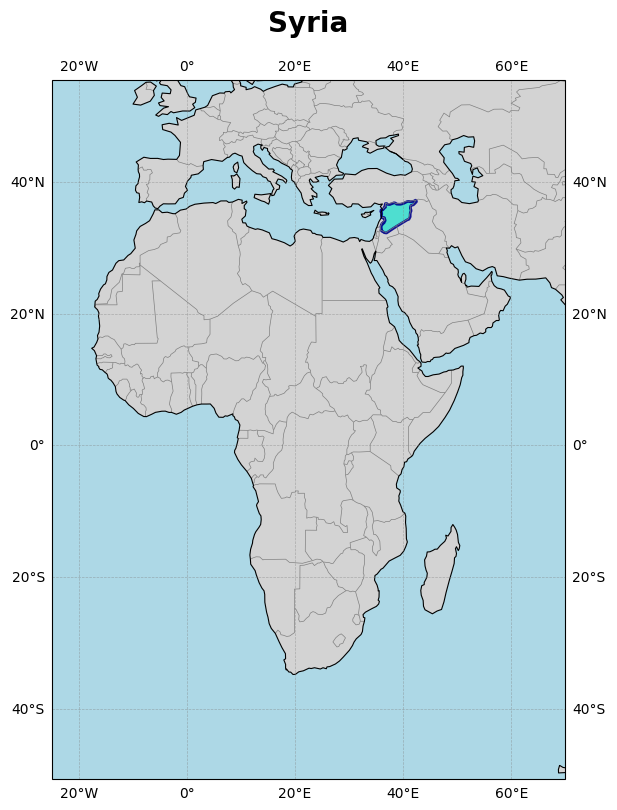

  ✓ Successfully created map for Syria
Creating map for: Tunisia


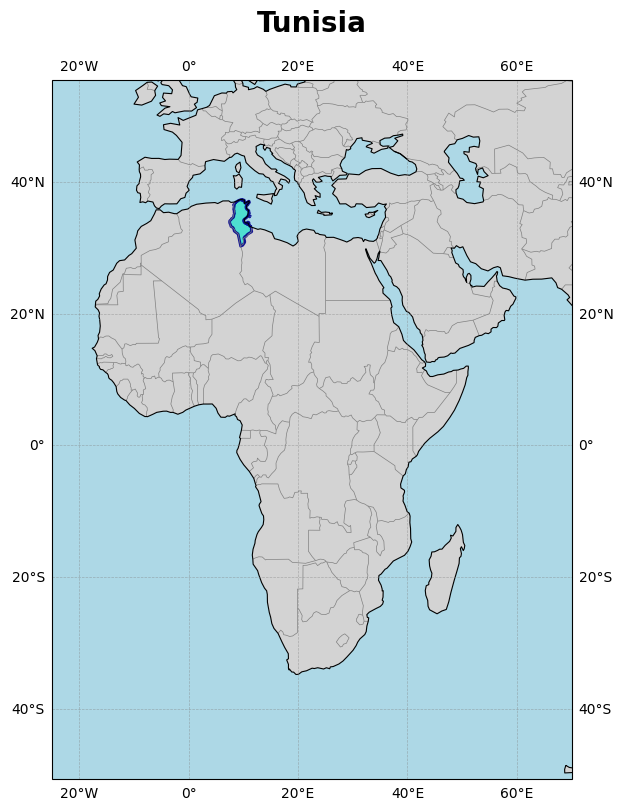

  ✓ Successfully created map for Tunisia
Creating map for: United Arab Emirates


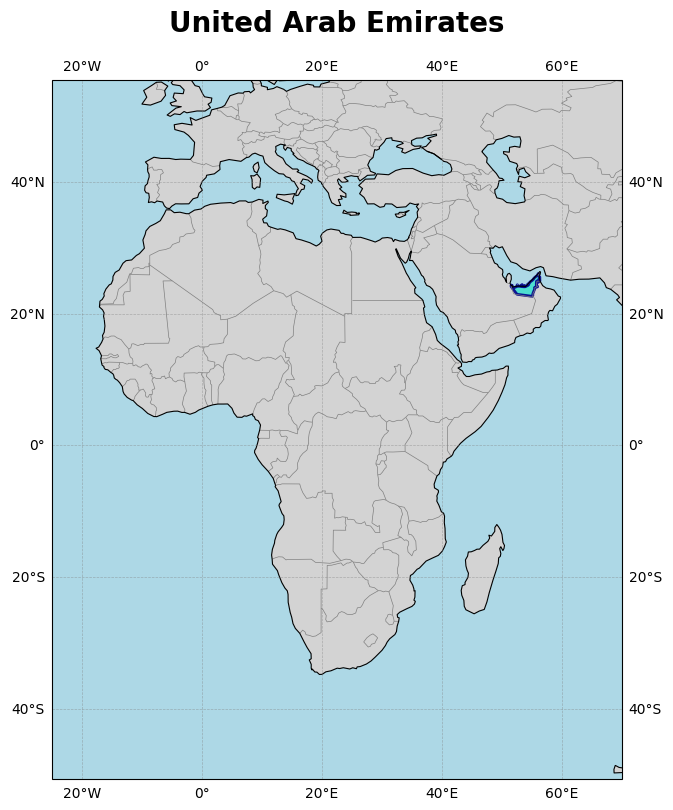

  ✓ Successfully created map for United Arab Emirates
Creating map for: South Africa


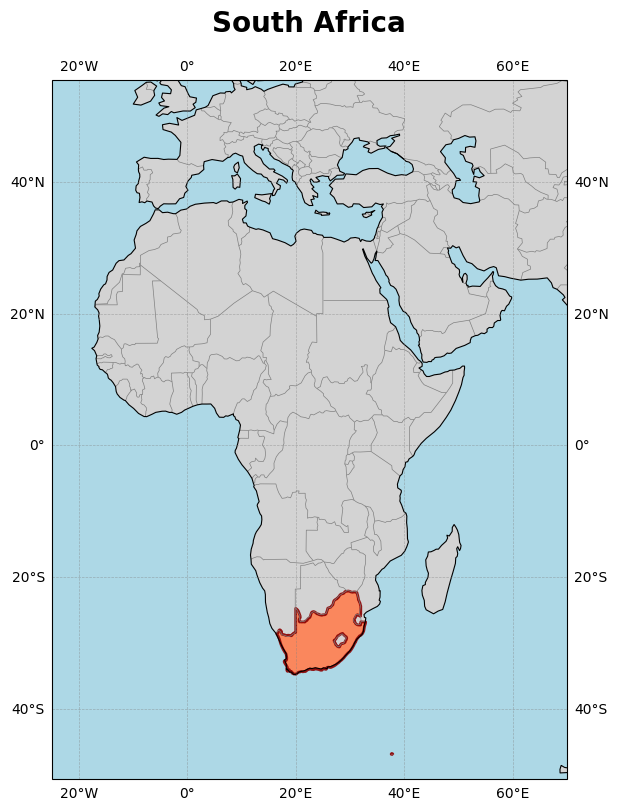

  ✓ Successfully created map for South Africa
Creating map for: Nigeria


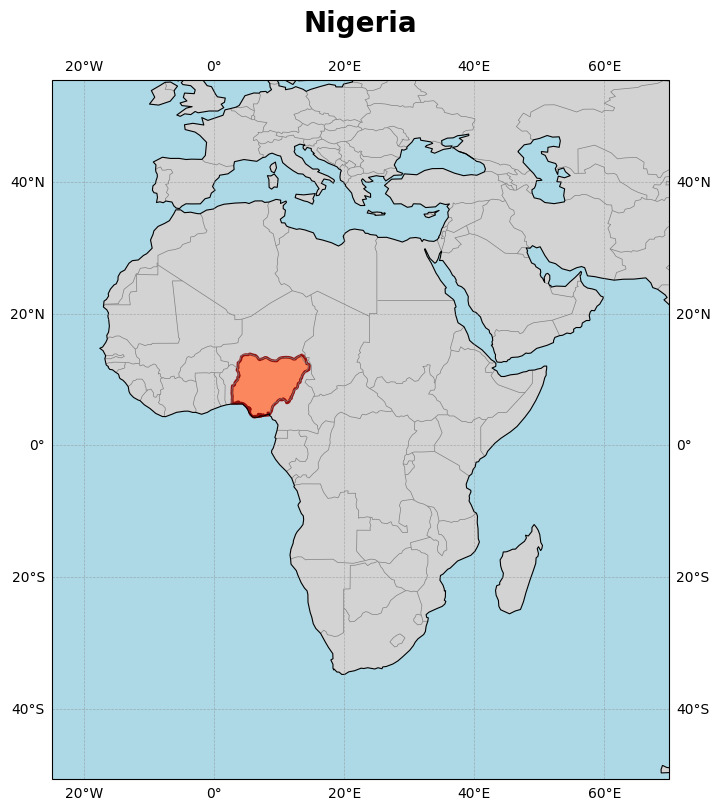

  ✓ Successfully created map for Nigeria
Creating map for: Kenya


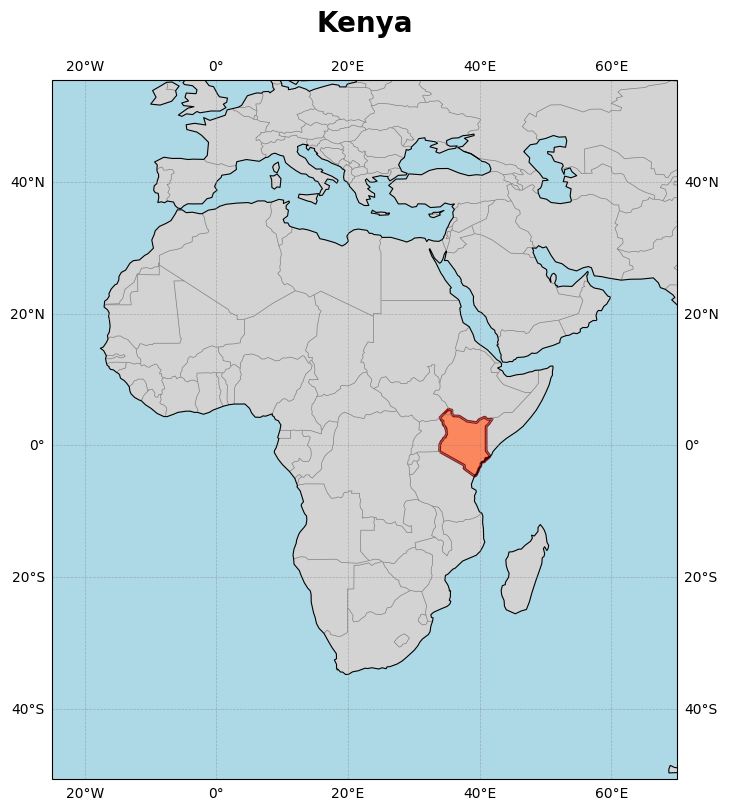

  ✓ Successfully created map for Kenya
Creating map for: Ethiopia


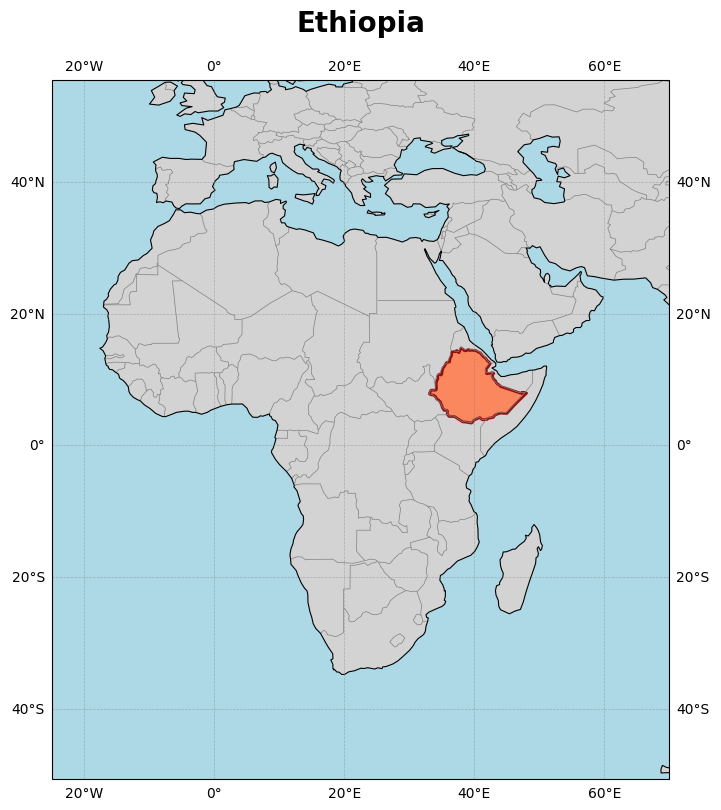

  ✓ Successfully created map for Ethiopia
Creating map for: Ghana


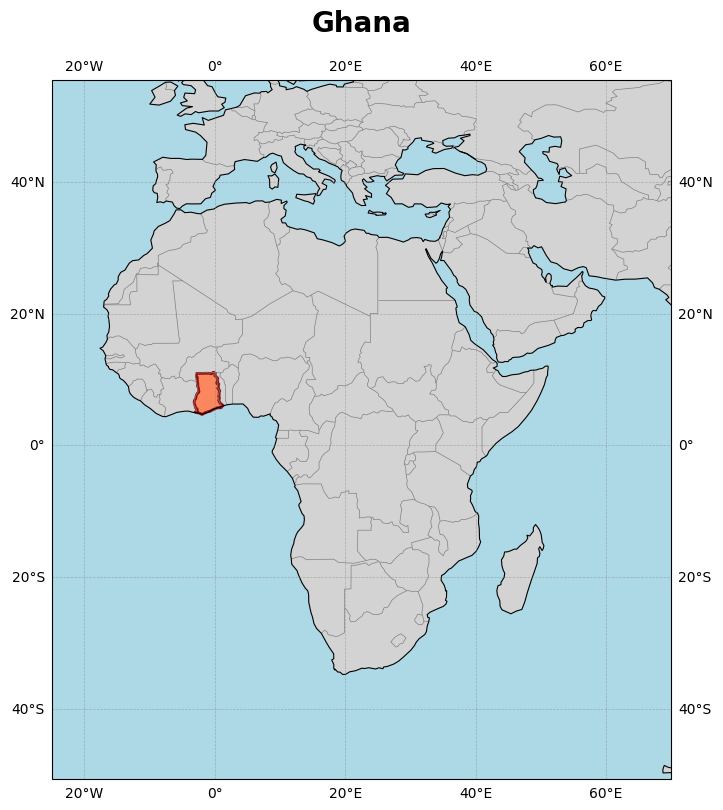

  ✓ Successfully created map for Ghana
Creating map for: Tanzania


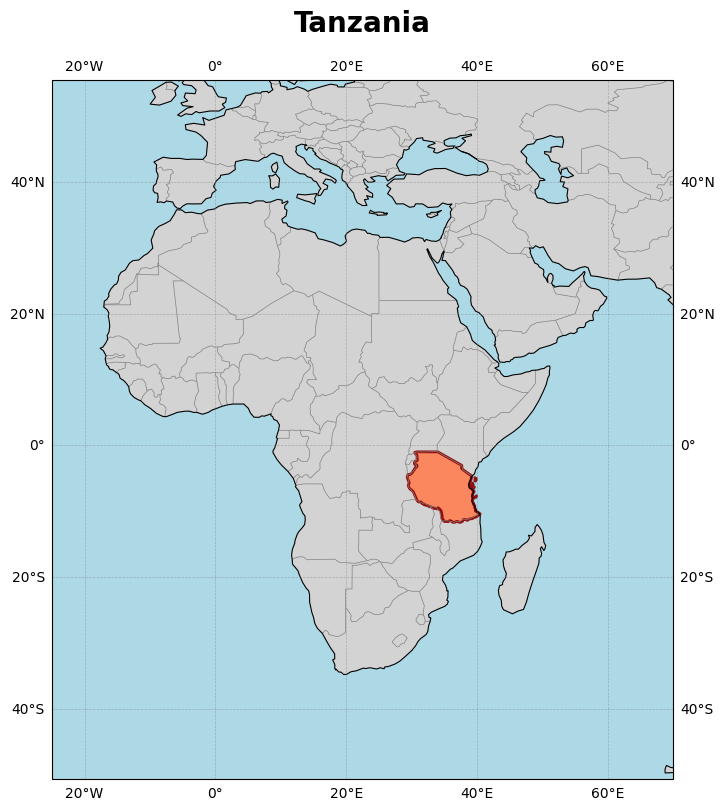

  ✓ Successfully created map for Tanzania
Creating map for: Uganda


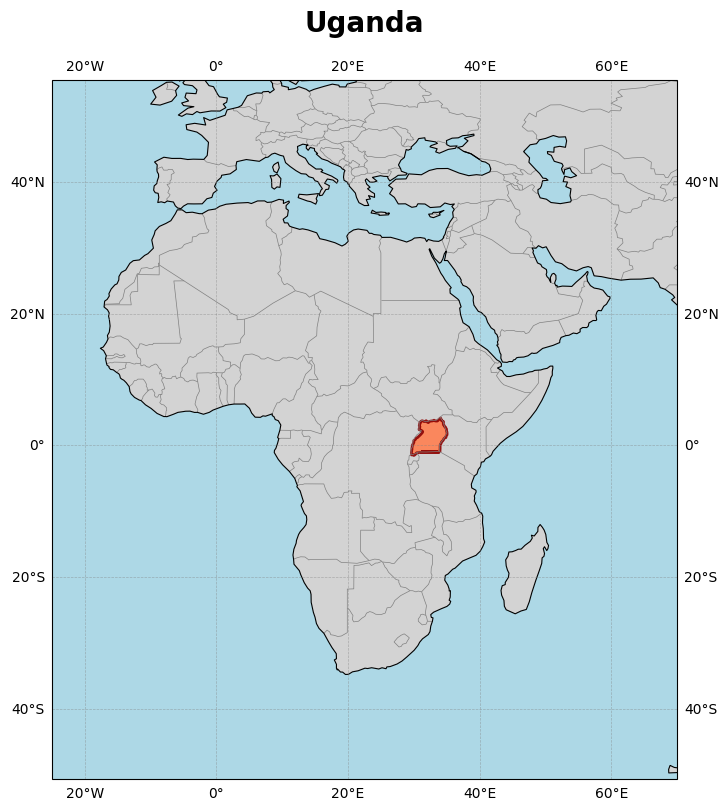

  ✓ Successfully created map for Uganda
Creating map for: Zimbabwe


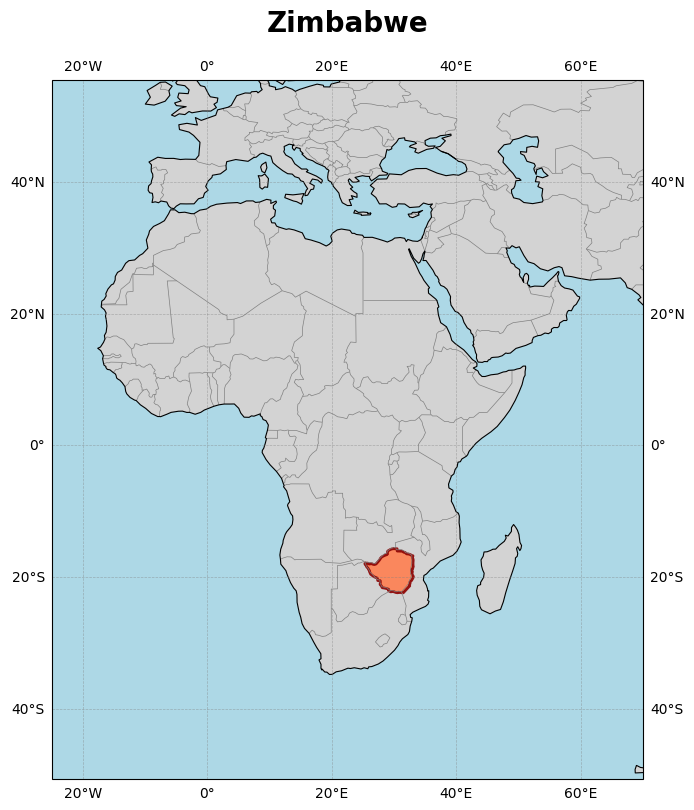

  ✓ Successfully created map for Zimbabwe
Creating map for: Botswana


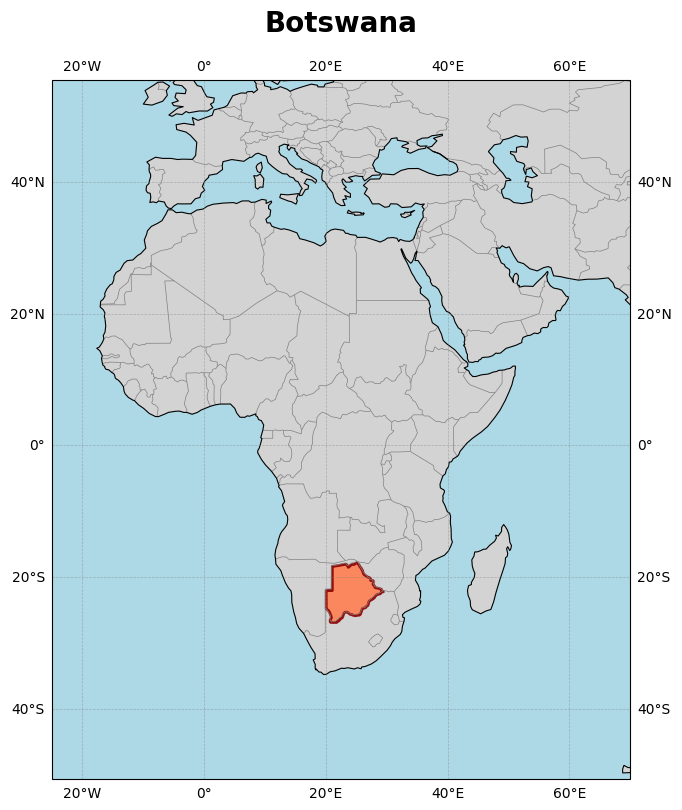

  ✓ Successfully created map for Botswana
Creating map for: Namibia


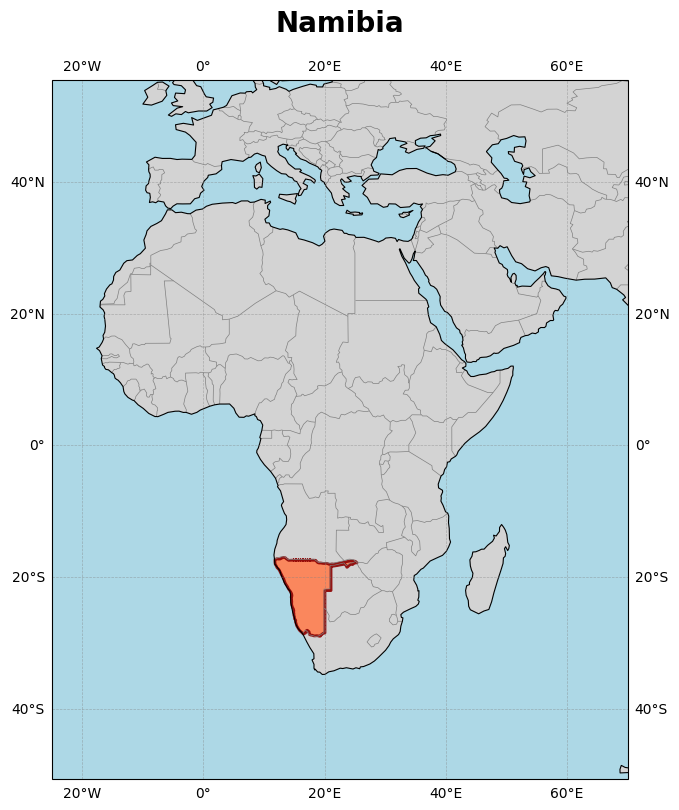

  ✓ Successfully created map for Namibia
Creating map for: Zambia


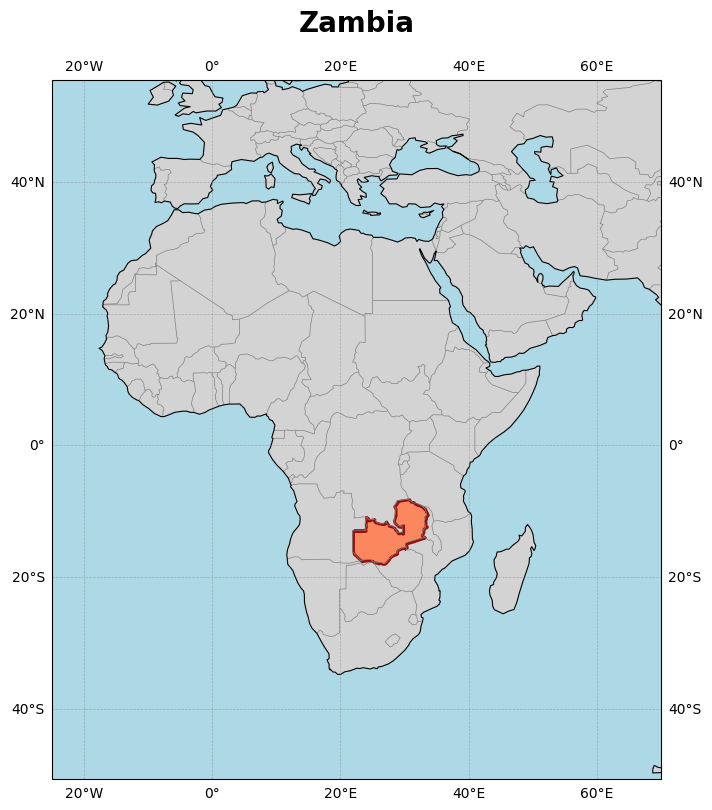

  ✓ Successfully created map for Zambia
Creating map for: Mozambique


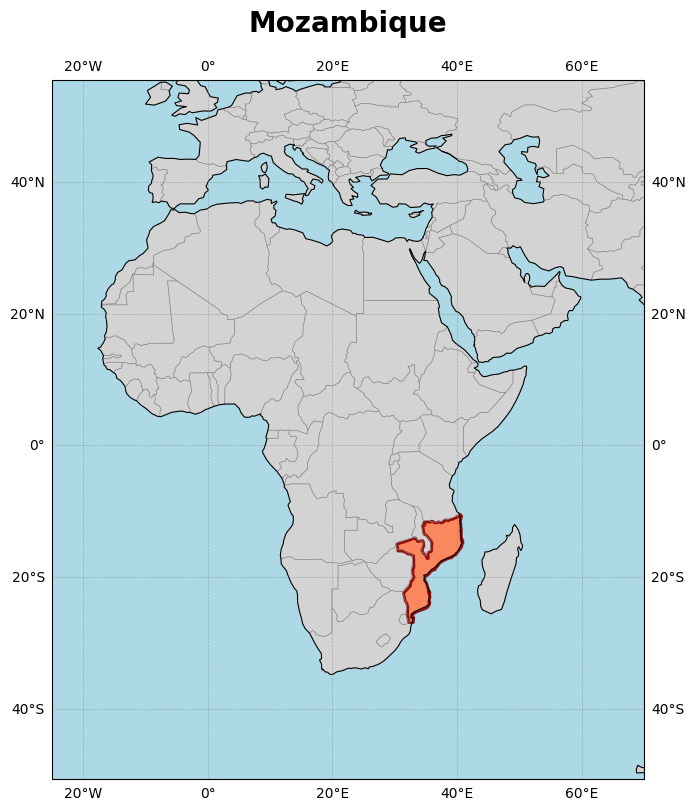

  ✓ Successfully created map for Mozambique
Creating map for: Angola


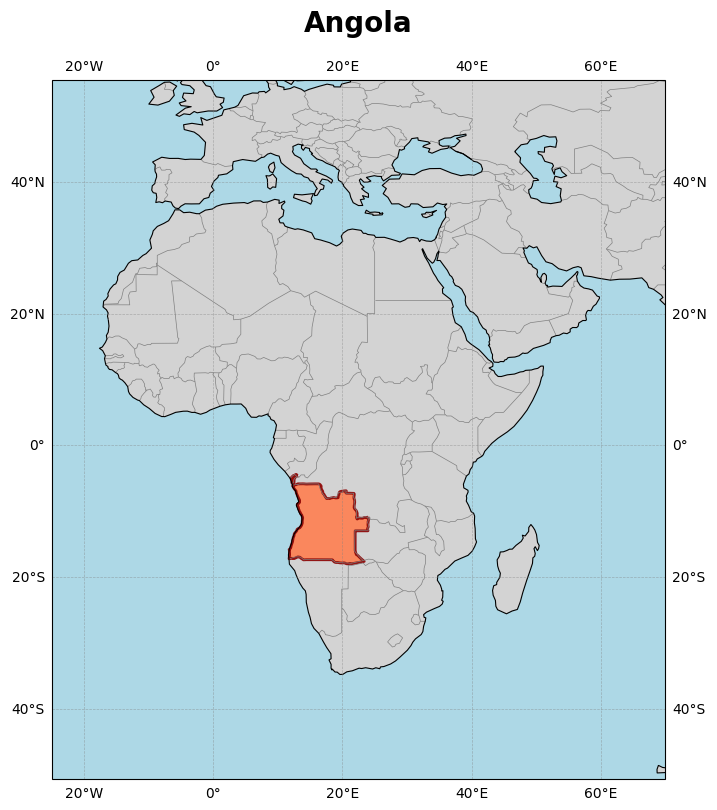

  ✓ Successfully created map for Angola
Creating map for: Cameroon


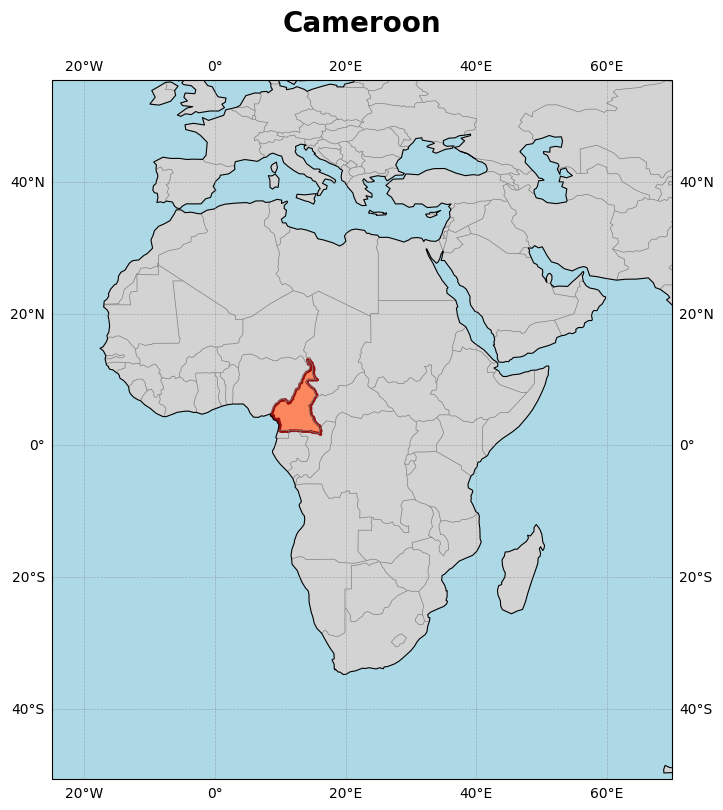

  ✓ Successfully created map for Cameroon
Creating map for: Ivory Coast


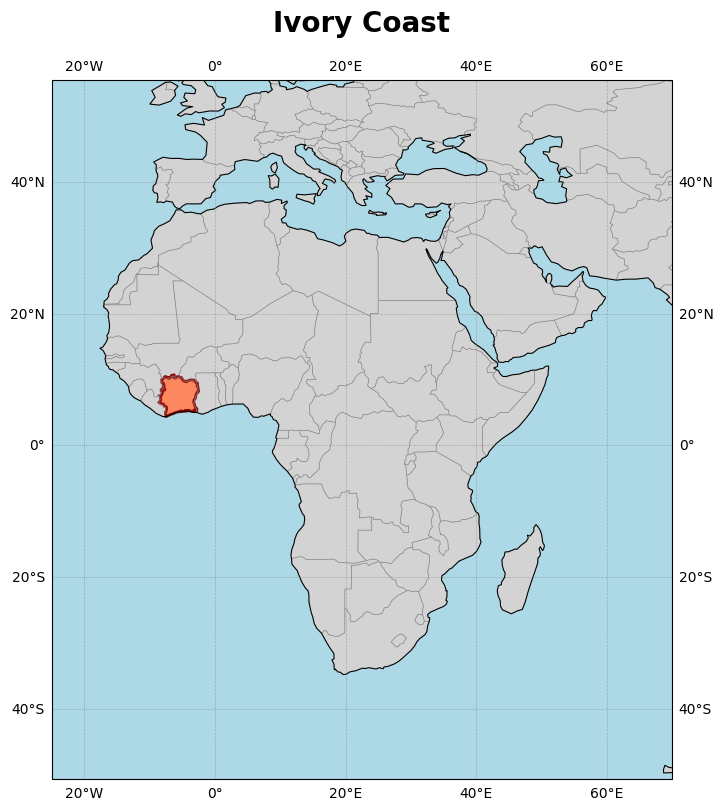

  ✓ Successfully created map for Ivory Coast
Creating map for: Senegal


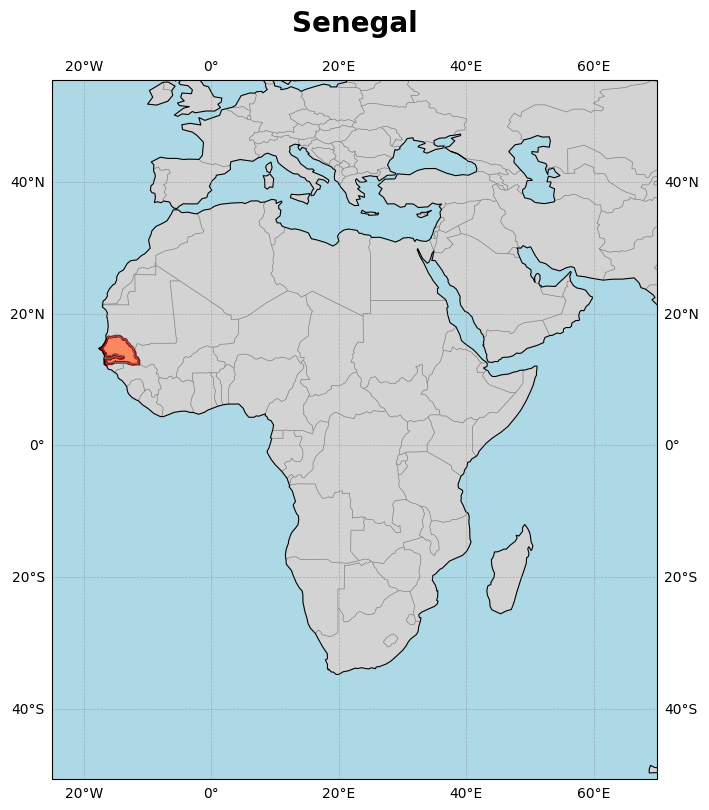

  ✓ Successfully created map for Senegal
Creating map for: Rwanda


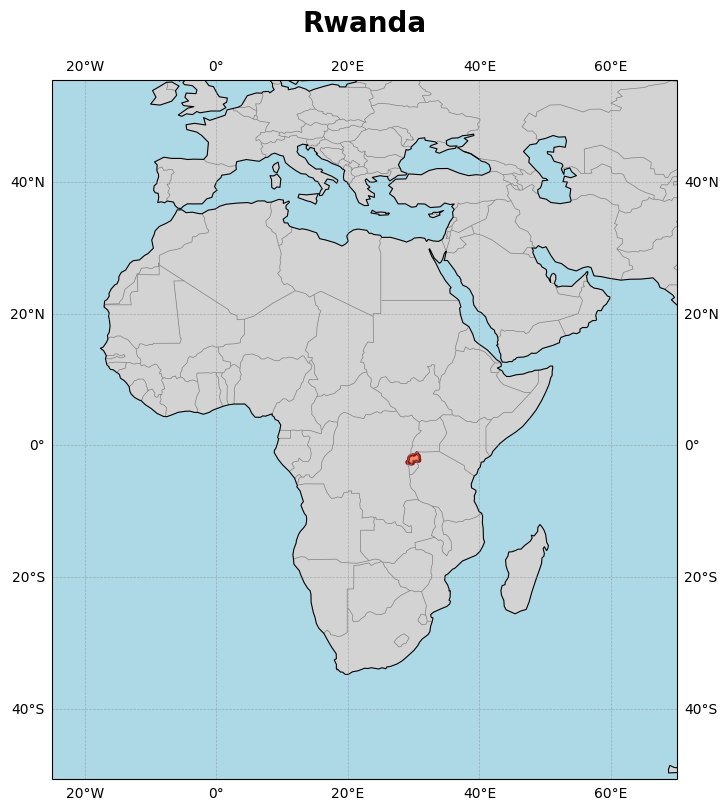

  ✓ Successfully created map for Rwanda
Creating map for: Mauritius


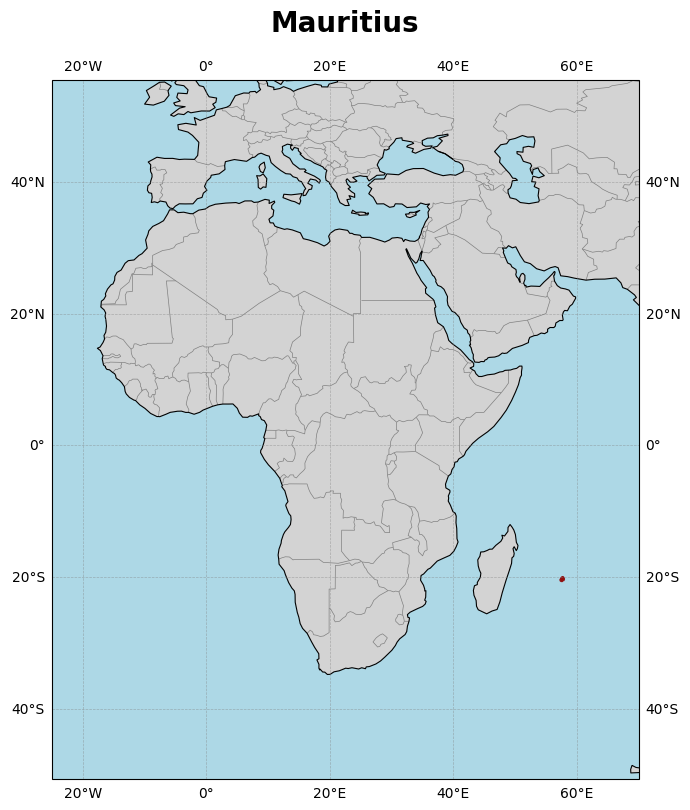

  ✓ Successfully created map for Mauritius

=== SUMMARY ===
Total countries: 35
Successfully mapped: 35
Failed to map: 0

Successfully mapped countries:
  - Algeria
  - Bahrain
  - Egypt
  - Iran
  - Iraq
  - Israel
  - Jordan
  - Kuwait
  - Lebanon
  - Libya
  - Morocco
  - Oman
  - Qatar
  - Saudi Arabia
  - Syria
  - Tunisia
  - United Arab Emirates
  - South Africa
  - Nigeria
  - Kenya
  - Ethiopia
  - Ghana
  - Tanzania
  - Uganda
  - Zimbabwe
  - Botswana
  - Namibia
  - Zambia
  - Mozambique
  - Angola
  - Cameroon
  - Ivory Coast
  - Senegal
  - Rwanda
  - Mauritius


In [4]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import geopandas as gpd
import pandas as pd
import os
import glob

# Define the Middle East and Africa Patent Hub countries
# MENA Countries
mena_countries = [
    'Algeria', 'Bahrain', 'Egypt', 'Iran', 'Iraq', 'Israel', 
    'Jordan', 'Kuwait', 'Lebanon', 'Libya', 'Morocco', 'Oman', 
    'Qatar', 'Saudi Arabia', 'Syria', 'Tunisia', 'United Arab Emirates'
]

# Major African countries typically included in MEA regions
african_countries = [
    'South Africa', 'Nigeria', 'Kenya', 'Ethiopia', 'Ghana', 'Tanzania',
    'Uganda', 'Zimbabwe', 'Botswana', 'Namibia', 'Zambia', 'Mozambique',
    'Angola', 'Cameroon', 'Ivory Coast', 'Senegal', 'Rwanda', 'Mauritius'
]

all_countries = mena_countries + african_countries
print(f"Creating individual maps for {len(all_countries)} countries")

# Check for existing shapefiles
shapefiles = glob.glob('**/*.shp', recursive=True)
if shapefiles:
    print(f"Found existing shapefiles: {shapefiles}")
    shapefile_path = shapefiles[0]
else:
    # Download Natural Earth data
    print("Downloading Natural Earth data...")
    url = 'https://naciscdn.org/naturalearth/50m/cultural/ne_50m_admin_0_countries.zip'
    
    # Download the file using wget
    os.system(f'wget -q -O ne_50m_admin_0_countries.zip "{url}"')
    
    # Extract the zip file
    os.system('unzip -q -o ne_50m_admin_0_countries.zip')
    
    # Find the shapefile
    shapefiles = glob.glob('**/*.shp', recursive=True)
    if shapefiles:
        shapefile_path = shapefiles[0]
        print(f"Extracted shapefile: {shapefile_path}")
    else:
        raise FileNotFoundError("Shapefile not found after extraction")

# Load the shapefile
print(f"Loading shapefile from: {shapefile_path}")
gdf = gpd.read_file(shapefile_path)
print(f"Shapefile loaded successfully with {len(gdf)} countries")

# Find the name column
name_columns = ['NAME', 'ADMIN', 'NAME_EN', 'SOVEREIGNT']
name_column = None
for col in name_columns:
    if col in gdf.columns:
        name_column = col
        print(f"Using '{name_column}' column for country names")
        break

if not name_column:
    raise ValueError("No suitable name column found")

# Country name mappings for variations
country_mappings = {
    'United Arab Emirates': ['United Arab Emirates', 'UAE'],
    'Iran': ['Iran', 'Iran (Islamic Republic of)'],
    'Syria': ['Syria', 'Syrian Arab Republic'],
    'Libya': ['Libya', 'Libyan Arab Jamahiriya'],
    'Ivory Coast': ['Ivory Coast', "Côte d'Ivoire", "Cote d'Ivoire"],
    'Tanzania': ['Tanzania', 'United Republic of Tanzania']
}

# Function to find country in shapefile
def find_country_shape(country_name):
    # Try exact match
    country_shape = gdf[gdf[name_column] == country_name]
    
    # Try variations if not found
    if country_shape.empty and country_name in country_mappings:
        for variant in country_mappings[country_name]:
            country_shape = gdf[gdf[name_column] == variant]
            if not country_shape.empty:
                break
    
    # Try case-insensitive partial match as last resort
    if country_shape.empty:
        country_shape = gdf[gdf[name_column].str.contains(country_name, case=False, na=False)]
    
    return country_shape

# Create individual maps for each country
successfully_mapped = []
failed_to_map = []

for country in all_countries:
    print(f"Creating map for: {country}")
    
    # Find the country in the shapefile
    country_shape = find_country_shape(country)
    
    if country_shape.empty:
        failed_to_map.append(country)
        print(f"  ✗ Could not find {country} in shapefile")
        continue
    
    # Create individual map
    fig = plt.figure(figsize=(12, 8))
    ax = plt.axes(projection=ccrs.PlateCarree())
    
    # Add map features (all countries in gray)
    ax.add_feature(cfeature.LAND, facecolor='lightgray')
    ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
    ax.add_feature(cfeature.BORDERS, linewidth=0.5, edgecolor='gray')
    ax.add_feature(cfeature.COASTLINE, linewidth=0.8)
    
    # Set extent to cover Middle East and Africa
    ax.set_extent([-25, 70, -40, 45])
    
    # Highlight only this country
    if country in mena_countries:
        country_shape.plot(ax=ax, facecolor='turquoise', edgecolor='darkblue', 
                          linewidth=2, alpha=0.9)
    else:  # African country
        country_shape.plot(ax=ax, facecolor='coral', edgecolor='darkred', 
                          linewidth=2, alpha=0.9)
    
    # Set title to just the country name
    ax.set_title(country, fontsize=20, fontweight='bold', pad=20)
    
    # Add grid
    gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
    gl.xlabel_style = {'size': 10}
    gl.ylabel_style = {'size': 10}
    
    plt.tight_layout()
    plt.show()
    
    successfully_mapped.append(country)
    print(f"  ✓ Successfully created map for {country}")

# Summary
print(f"\n=== SUMMARY ===")
print(f"Total countries: {len(all_countries)}")
print(f"Successfully mapped: {len(successfully_mapped)}")
print(f"Failed to map: {len(failed_to_map)}")

if failed_to_map:
    print(f"\nCountries that could not be mapped:")
    for country in failed_to_map:
        print(f"  - {country}")

print(f"\nSuccessfully mapped countries:")
for country in successfully_mapped:
    print(f"  - {country}")